In [2]:
# Develop a program for Statistical Analysis of Data: Central Tendency, Dispersion, Correlation, and Simpson’s Paradox


# 1. Import Required Libraries
# -----------------------------------------------

# Pandas: 
# Used for data manipulation, cleaning, and analysis.
# It provides powerful data structures like DataFrame and Series.
import pandas as pd    

# NumPy: 
# Stands for Numerical Python.
# It handles mathematical functions, arrays, and numerical computations efficiently.
import numpy as np     

# Seaborn: 
# A statistical visualization library built on top of Matplotlib.
# It comes with attractive default themes and works well with Pandas DataFrames.
import seaborn as sns  



C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# -----------------------------------------------
# 2. Load the Titanic Dataset
# -----------------------------------------------

# OPTION 1: Load from a CSV file using pandas
# Uncomment and change the path if you have a local CSV file
# titanic = pd.read_csv("titanic.csv")  
# This reads the file into a Pandas DataFrame.
# You can now use DataFrame functions to inspect and analyze it.

# OPTION 2: Load Seaborn’s built-in Titanic dataset
# Seaborn includes several sample datasets, including 'titanic'
titanic = sns.load_dataset('titanic')



In [4]:

# -------------------------------------------------
# 3. Basic Dataset Information & First Look
# -------------------------------------------------

# The Titanic dataset is now stored in the variable `titanic` as a Pandas DataFrame.
# A DataFrame is like an Excel sheet in memory, with rows (records) and columns (fields).

# (1) SHAPE OF DATA
# The `.shape` attribute returns a tuple (rows, columns).
# - The first value = number of rows (observations, records, passengers here).
# - The second value = number of columns (variables, features, attributes).
# This helps us quickly understand the dataset size.
print("Shape:", titanic.shape)  
# Example: Output might be (891, 15) → meaning 891 passengers × 15 attributes.

# (2) COLUMN NAMES
# The `.columns` attribute returns all the column names as an Index object.
# These names tell us what features are available for analysis.
# Each name corresponds to a variable in the dataset, such as 'age', 'fare', 'sex', etc.
print("\nColumns:", titanic.columns)  

# (3) DATA TYPES OF EACH COLUMN
# The `.dtypes` attribute lists the data type of each column:
# - int64   → integers (e.g., survived = 0 or 1)
# - float64 → decimal numbers (e.g., fare, age)
# - object  → string/text values (e.g., passenger name, cabin)
# - category → categorical variables (efficient storage for repeated values like 'male', 'female')
# Understanding types is important because:
#   * Statistical operations only work on numeric columns.
#   * Categorical/text columns might need encoding before modeling.
print("\nData Types:\n", titanic.dtypes)  

# (4) FIRST FEW ROWS
# The `.head()` method shows the first 5 rows by default (use .head(n) for n rows).
# This is a quick way to inspect sample data and see how values are stored.
# It’s useful for:
#   * Checking if columns contain the expected type of values.
#   * Spotting any obvious data entry errors.
#   * Understanding how missing values are represented (often as NaN).
print("\nFirst 5 Rows:\n", titanic.head())  



# Extend overview if required to make data overview more complete 
titanic.info()   # Shows data types, non-null counts, and memory usage
titanic.describe()  # Gives statistical summary for numeric columns

Shape: (891, 15)

Columns: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

First 5 Rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# -------------------------------------------------
# 4. Measures of Dispersion (Spread of Data)
# -------------------------------------------------
# Central tendency tells us the "center" of the data,
# but it doesn't show how spread out the values are.
# Dispersion measures help us understand the variability in the dataset.

# =======================
# a. RANGE
# =======================
# Range = Maximum value - Minimum value
# It gives the total spread, but is highly affected by extreme values.
age_range = titanic['age'].max() - titanic['age'].min()
fare_range = titanic['fare'].max() - titanic['fare'].min()
print("Age Range:", age_range)
print("Fare Range:", fare_range)

Age Range: 79.58
Fare Range: 512.3292


## What is the Five-Number Summary?
The Five-Number Summary is a quick statistical description of a dataset’s spread.
It includes:

1. Minimum – The smallest value in the dataset.
2. First Quartile (Q1) – The value below which 25% of the data lies.
3. Median (Q2) – The middle value (50% of data below, 50% above).
4. Third Quartile (Q3) – The value below which 75% of the data lies.
5. Maximum – The largest value in the dataset.

 Why It’s Useful
 
Gives a snapshot of data distribution without looking at every value.
Shows where the middle 50% of data lies (between Q1 and Q3).
Helps detect outliers — values much lower than Q1 or higher than Q3 are possible outliers.

Why We Calculate It

Quick overview of data distribution without plotting.
Spotting outliers → If max is much higher than Q3 + 1.5×IQR (or min much lower than Q1 − 1.5×IQR), there may be outliers.
Understanding spread → See if data is tightly clustered or widely spread.
Guides preprocessing → Helps decide scaling, transformation, or removal of anomalies.



In [6]:

# =======================
# b. FIVE-NUMBER SUMMARY
# =======================
# Includes: min, Q1 (25%), median (50%), Q3 (75%), max
# Describes the spread and helps in detecting outliers.

# Statistic	Meaning (in Titanic context)
# count	Number of non-missing entries (e.g., 714 known ages out of 891 passengers).
# mean	Average value (central tendency).
# std	Standard deviation (spread).
# min	Minimum value in dataset (lowest age/fare).
# 25% (Q1)	First quartile (25% of passengers had a value below this).
# 50% (Median)	Middle value.
# 75% (Q3)	Third quartile (75% of passengers had a value below this).
# max	Maximum value in dataset (highest age/fare).



print("\nFive-number summary:\n", titanic[['age', 'fare']].describe())




Five-number summary:
               age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


## Example of interpretation  from Titanic

For age:

1. min ≈ 0.42 → a baby.
2. Q1 ≈ 20.12 → 25% were younger than 20.
3. median = 28 → typical middle age.
4. Q3 = 38 → 75% were younger than 38.
5. max = 80 → oldest passenger.


For fare:

1. min = 0.0 → some passengers traveled for free.
2. Q1 ≈ 7.91 → 25% paid less than ₹7.91.
3. median ≈ 14.45 → half paid less than ₹14.45.
4. Q3 ≈ 31.0 → 75% paid less than ₹31.
5. max ≈ 512.33 → very expensive 1st-class ticket.



In [7]:
# ==========================================
# CENTRAL TENDENCY MEASURES (Age & Fare)
# ==========================================
# Central tendency tells us where the "center" of our data lies.
# We use three common measures: Mean, Median, and Mode.
# Calculating them for both 'age' and 'fare' columns in the Titanic dataset.

# --- AGE ---
# Mean: Average passenger age (sum of all ages ÷ number of passengers with known age).
# Median: Middle passenger age when all ages are sorted in order.
# Mode: Most frequently occurring passenger age in the dataset.
print("Age - Mean:", titanic['age'].mean())         # Sensitive to outliers (extreme ages)
print("Age - Median:", titanic['age'].median())     # Better for skewed data
print("Age - Mode:", titanic['age'].mode().values)  # Useful for finding most common value

# --- FARE ---
# Mean: Average ticket price across all passengers.
# Median: Middle ticket price when fares are sorted from lowest to highest.
# Mode: Most frequently occurring ticket price (can indicate standard fare/class).
print("Fare - Mean:", titanic['fare'].mean())
print("Fare - Median:", titanic['fare'].median())
print("Fare - Mode:", titanic['fare'].mode().values)

# NOTE:
# - Mean ≈ Median → Data is roughly symmetric.
# - Mean > Median → Right-skewed (some very large values pulling mean up).
# - Mean < Median → Left-skewed (some very small values pulling mean down).
# This helps in detecting skewness and deciding how to treat missing values.

Age - Mean: 29.69911764705882
Age - Median: 28.0
Age - Mode: [24.]
Fare - Mean: 32.2042079685746
Fare - Median: 14.4542
Fare - Mode: [8.05]


Why We Calculate These
    To understand our dataset quickly without looking at every single value.

To see if the data is skewed:

  -  If mean ≈ median → distribution is roughly symmetric.
  -  If mean > median → data is right-skewed (some very large values).
  -  If mean < median → data is left-skewed (some very small values).
  -  To decide how to handle missing values (e.g., replace missing ages with median instead of mean if data is skewed).
 

In [8]:
# ============================
# 6. VARIANCE & STANDARD DEVIATION
# ============================
# These are measures of DISPERSION (spread) in the data.
# They tell us how far the values are from the mean.

# --- Variance ---
# Definition: The average of the squared differences from the mean.
# Why square the differences?
#   → Squaring ensures all deviations are positive
#   → Gives more weight to larger deviations (extreme values/outliers)
# Units: Squared units of the original data (e.g., age^2 years^2), which can be harder to interpret.

# --- Standard Deviation ---
# Definition: The square root of the variance.
# Why take the square root?
#   → Brings the measure back to the same unit as the original data (e.g., years, dollars)
# Interpretation:
#   → Low std. dev. → Data points are close to the mean (low spread)
#   → High std. dev. → Data points are spread far from the mean (high spread)

# Calculate variance for Age and Fare
age_variance = titanic['age'].var()
fare_variance = titanic['fare'].var()

# Calculate standard deviation for Age and Fare
age_std = titanic['age'].std()
fare_std = titanic['fare'].std()

# Display the results
print("\nVariance:\nAge:", age_variance, " Fare:", fare_variance)
print("Standard Deviation:\nAge:", age_std, " Fare:", fare_std)

# NOTE:
# - Variance and Standard Deviation are sensitive to outliers.
# - Comparing Age and Fare here:
#     → Age variance/std. dev. will be smaller because passenger ages are naturally limited.
#     → Fare variance/std. dev. will be larger because ticket prices vary widely.


Variance:
Age: 211.0191247463081  Fare: 2469.436845743117
Standard Deviation:
Age: 14.526497332334044  Fare: 49.693428597180905


### Interpretation in your dataset:

    Age variance (211) / std. dev. (~14.5 years) → Passenger ages are moderately spread around the mean (~30 years). Most are within 15 years of that average.
    
    Fare variance (2469) / std. dev. (~49.7) → Ticket prices have a huge spread. This is due to the difference between cheap 3rd-class tickets and expensive 1st-class cabins.
    Skew note: Because fares are highly skewed, the large standard deviation is mainly due to a few extremely high prices.         

In [13]:
# 8. Correlation

# Pearson Correlation:
# The Pearson correlation coefficient measures the linear relationship 
# between two continuous variables (e.g., age and fare). 
# Its value ranges from -1 to +1:
#   +1 → Perfect positive correlation (as one increases, the other increases proportionally)
#    0 → No linear correlation (the variables don’t have a linear relationship)
#   -1 → Perfect negative correlation (as one increases, the other decreases proportionally)

# Here, we compute the correlation between 'age' and 'fare' columns of Titanic dataset.
# 'titanic[['age', 'fare']]' selects only these two columns.
# The .corr() function by default computes Pearson correlation.

print(titanic[['age', 'fare']].corr())   
# The output will be a 2x2 correlation matrix:
#Diagonal values will always be 1.0 (a variable is perfectly correlated with itself).
#Off-diagonal values show the correlation between age and fare.
# This means age and fare have a weak positive correlation (~0.0.09).



#Why Pearson correlation may not be the best for Titanic data
# Pearson correlation assumes:
# 1. Linearity → The relationship between two variables should be linear.
# 2. Normality → Both variables should be approximately normally distributed.
# 3. Continuous data without extreme outliers.

# In Titanic dataset:
# - 'age' is continuous, but it often has missing values and may not be perfectly normal.
# - 'fare' is highly skewed (a few passengers paid extremely high fares).
#   → This breaks the normality assumption.
# - The relationship between 'age' and 'fare' is not strongly linear.

# Because of this, Pearson correlation may give a misleadingly low or high value.







           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


In [10]:
#Simpson’s Paradox Example


# Simpson’s Paradox occurs when a trend appears in several different groups 
# of data but reverses (or disappears) when these groups are combined.
# In the Titanic dataset, survival rates illustrate this paradox.

# 1. Overall survival rate:
# This gives the mean value of 'survived' column (0 = died, 1 = survived).
# So it represents the overall percentage of passengers who survived.
print("Overall survival rate:", titanic['survived'].mean())

# 2. Survival rate by gender:
# Here, we group passengers by 'sex' (male/female) and compute the mean survival rate.
# This shows how survival chances differed between men and women overall.
print(titanic.groupby('sex')['survived'].mean())

# 3. Survival rate by class and gender:
# Now, we group by both 'pclass' (1st, 2nd, 3rd class) AND 'sex'.
# This reveals the finer details — within each class, the survival rates for men vs. women.
# Sometimes the gender advantage flips when you consider class separately.
print(titanic.groupby(['pclass', 'sex'])['survived'].mean())

Overall survival rate: 0.3838383838383838
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64


In [51]:


# =======================
# 7. INTERQUARTILE RANGE (IQR)
# =======================
# IQR = Q3 - Q1
# Definition:
#   → Q1 (25th percentile) = Value below which 25% of the data lies
#   → Q3 (75th percentile) = Value below which 75% of the data lies
#   → IQR = Spread of the middle 50% of the data
#
# Why use IQR?
#   → It ignores the lowest 25% and highest 25% of the data
#   → Less sensitive to extreme values (outliers) compared to variance/std. dev.
#   → Often used in boxplots for detecting outliers
#
# Formula for detecting outliers using IQR:
#   Lower bound = Q1 - 1.5 * IQR
#   Upper bound = Q3 + 1.5 * IQR
#   Values outside this range are considered potential outliers.

# Calculate IQR for Age and Fare
iqr_age = titanic['age'].quantile(0.75) - titanic['age'].quantile(0.25)
iqr_fare = titanic['fare'].quantile(0.75) - titanic['fare'].quantile(0.25)

# Display the results
print("\nIQR:\nAge:", iqr_age, " Fare:", iqr_fare)

# # INTERPRETATION for Titanic dataset:
# Age IQR → Typical passenger's age falls within this range around the median
# Fare IQR → Shows the middle ticket price range; large spread here means big price differences between classes.




IQR:
Age: 17.875  Fare: 23.0896


### Meaning:

Age IQR (~17.88 years) → Middle 50% of passengers are within an 18-year age range.

Fare IQR (~23.09) → Middle 50% of fares differ by about 23 currency units, but there are still extreme

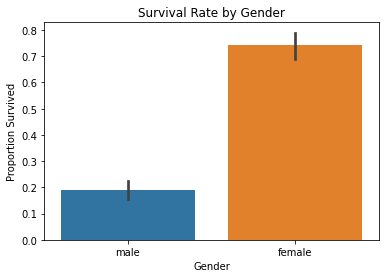

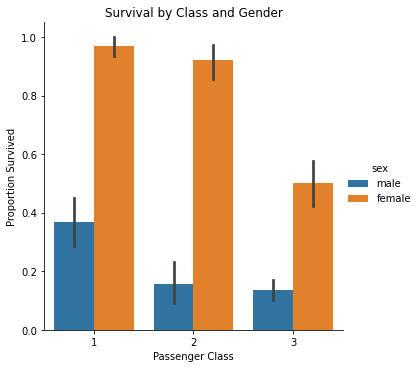

In [52]:
# =======================
# VISUALIZATION: Survival Analysis
# =======================
# Purpose:
#   → To explore the relationship between passenger characteristics and survival rate.
#   → Visualization helps us see patterns in the data that are harder to spot in raw numbers.

import matplotlib.pyplot as plt
import seaborn as sns

# Survival rate by Gender
# ---------------------------
# Why this is important:
#   → Historical accounts suggest "women and children first" during evacuation.
#   → This plot will show if gender played a role in survival probability.
#
# How to read:
#   → y-axis shows the proportion of passengers who survived (0 = none, 1 = all survived).
#   → Compare male vs female bars to see which gender had higher survival rates.
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.ylabel('Proportion Survived')
plt.xlabel('Gender')
plt.show()

# Survival rate by Passenger Class and Gender
# -----------------------------------------------
# Why this is important:
#   → Passenger class (1st, 2nd, 3rd) reflects both ticket price and location on ship.
#   → Combining with gender may reveal interactions (e.g., 1st-class females vs 3rd-class males).
#
# How to read:
#   → Bars are grouped by passenger class (x-axis) and colored by gender (hue).
#   → Taller bars mean higher survival proportion.
sns.catplot(x='pclass', y='survived', hue='sex', kind='bar', data=titanic)
plt.title('Survival by Class and Gender')
plt.ylabel('Proportion Survived')
plt.xlabel('Passenger Class')
plt.show()

# INTERPRETATION (Titanic dataset typical pattern):
# - Females had a much higher survival rate than males.
# - 1st-class passengers survived more often than 3rd-class.
# - 3rd-class males had the lowest survival rate, while 1st-class females had the highest.
